<a href="https://colab.research.google.com/github/ks-ki16/projects-code/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*** Hotel Booking Data Science Projects***

**Setup and Import Libraries**

In [ ]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


**Load the Dataset**

In [ ]:

# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Hotel Bookings.csv')

# Preview the first few rows
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Initial Data Exploration**

In [ ]:
# Basic info
df.info()

# Summary stats
df.describe()

# Check for missing values
df.isnull().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**Data Cleaning & Feature Engineeringt**

In [ ]:
# Drop missing values and make a copy to avoid chained assignment issues
df = df.dropna().copy()

# Combine stay columns safely
df.loc[:, 'total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Family flag
df.loc[:, 'is_family'] = ((df['adults'] > 1) & (df['children'] + df['babies'] > 0)).astype(int)

# Convert reservation date
df.loc[:, 'reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Convert month name to number
df.loc[:, 'month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Show updated Data Frame
df[['lead_time', 'adr', 'total_stay', 'is_family', 'reservation_status_date']].head()


,lead_time,adr,total_stay,is_family,reservation_status_date
2392,6,82.0,2,0,2015-10-13
2697,24,52.2,22,0,2015-11-17
2867,24,48.0,3,0,2015-11-06
2877,24,40.0,12,0,2015-11-15
2878,24,48.0,13,0,2015-11-16


# ***Exploratory Data Analysis (EDA)***

a) When are bookings typically made?

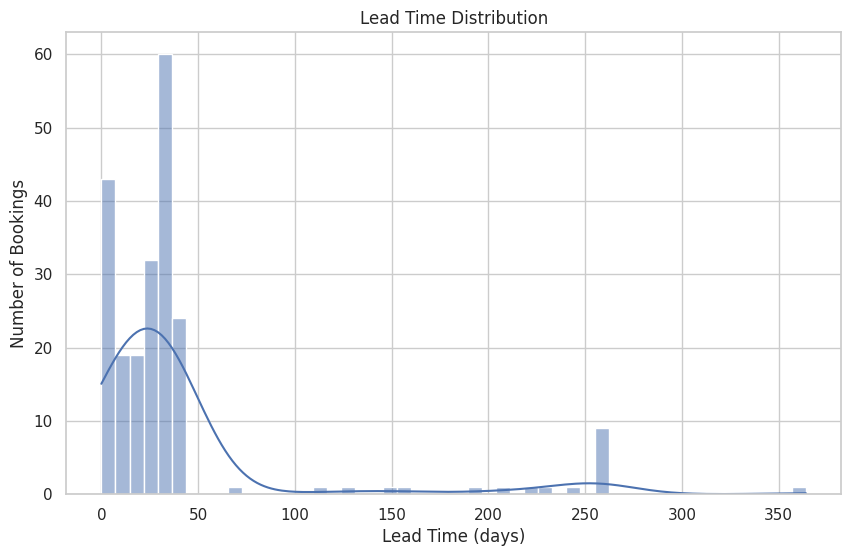

In [ ]:
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()


b) Bookings by month

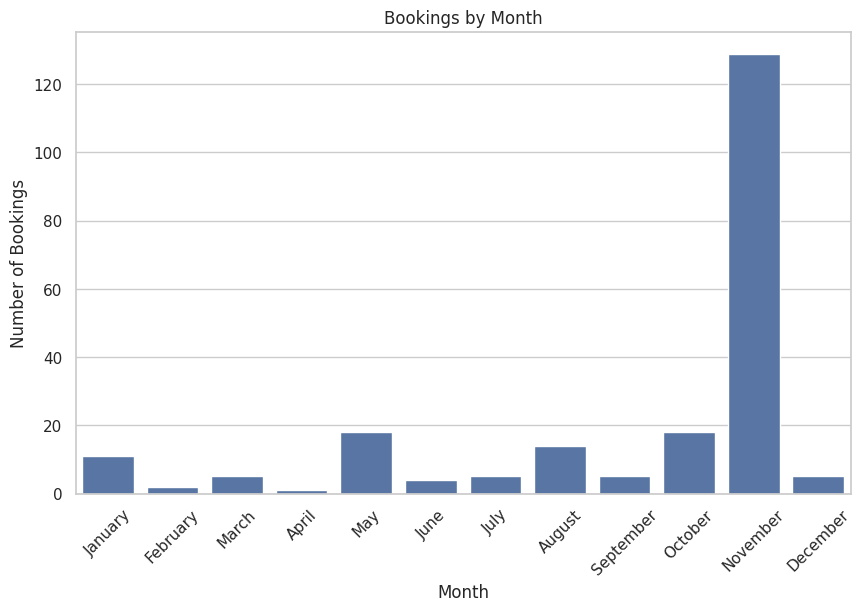

In [ ]:
monthly = df['arrival_date_month'].value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
)

sns.barplot(x=monthly.index, y=monthly.values)
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


c) Stay Duration vs ADR

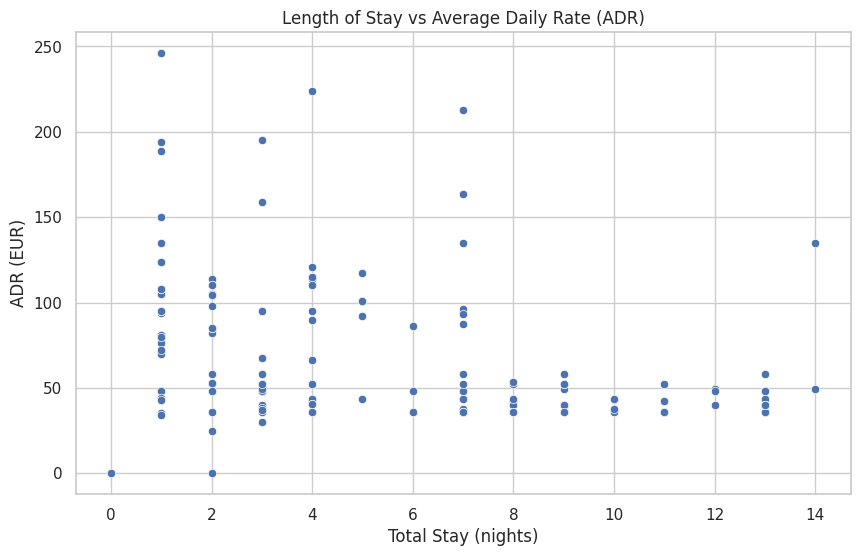

In [ ]:
sns.scatterplot(data=df[df['total_stay'] <= 14], x='total_stay', y='adr')
plt.title('Length of Stay vs Average Daily Rate (ADR)')
plt.xlabel('Total Stay (nights)')
plt.ylabel('ADR (EUR)')
plt.show()


d) Demographic impact: Is the guest a repeat?

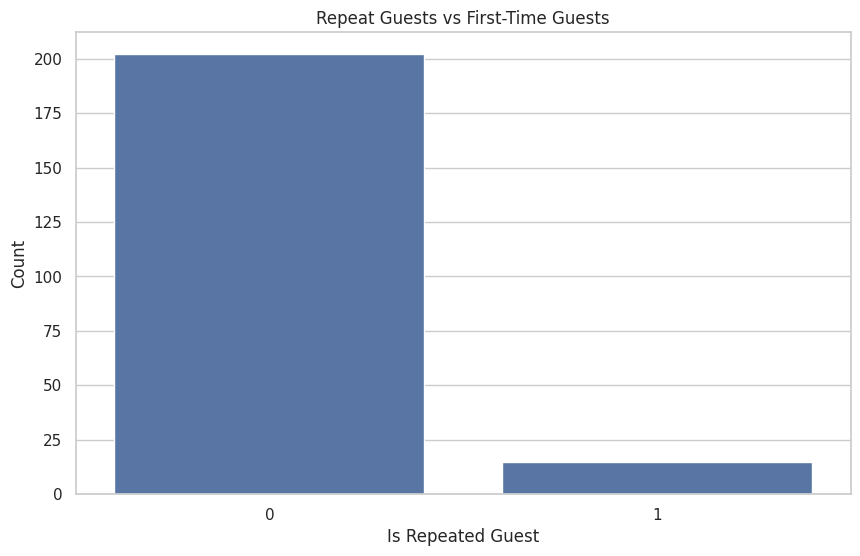

In [ ]:
sns.countplot(x='is_repeated_guest', data=df)
plt.title('Repeat Guests vs First-Time Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Count')
plt.show()


**Special Requests Analysis**

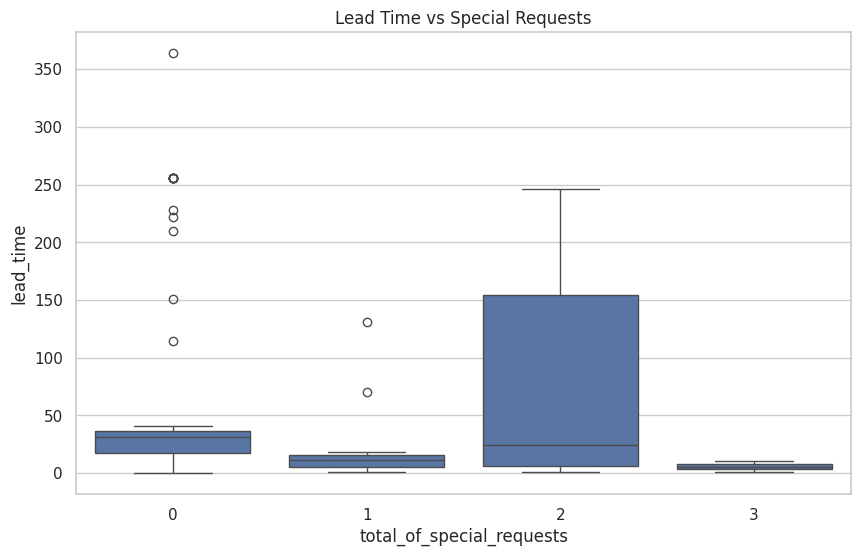

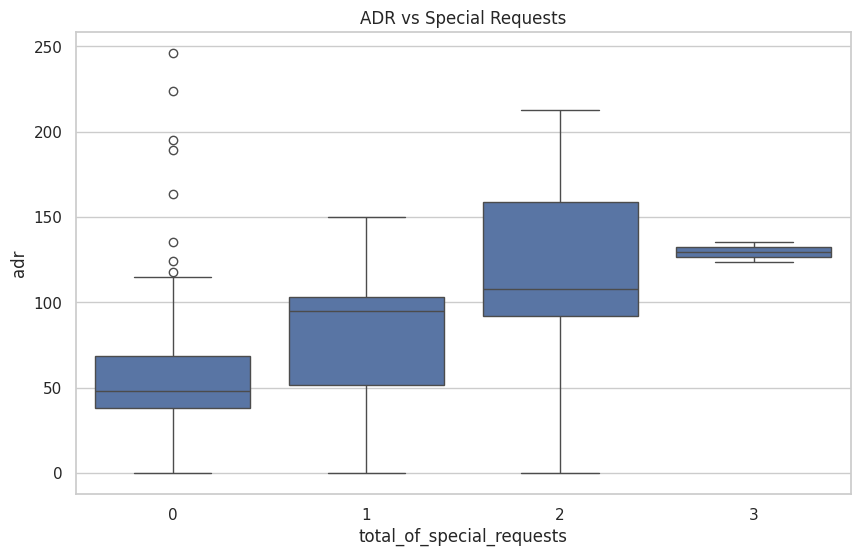

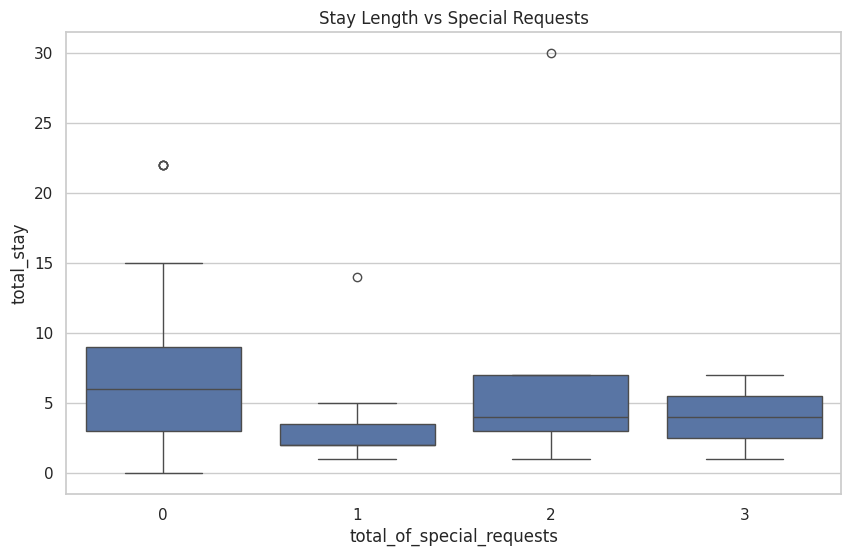

In [ ]:
sns.boxplot(x='total_of_special_requests', y='lead_time', data=df)
plt.title('Lead Time vs Special Requests')
plt.show()

sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title('ADR vs Special Requests')
plt.show()

sns.boxplot(x='total_of_special_requests', y='total_stay', data=df)
plt.title('Stay Length vs Special Requests')
plt.show()


**Predictive Modeling**

In [ ]:
# Binary classification target
df['has_special_request'] = (df['total_of_special_requests'] > 0).astype(int)

# Feature set
features = ['lead_time', 'total_stay', 'adr', 'is_repeated_guest', 'is_family']
X = df[features]
y = df['has_special_request']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.67      0.29      0.40         7

    accuracy                           0.86        44
   macro avg       0.77      0.63      0.66        44
weighted avg       0.84      0.86      0.84        44



**Save Insights and Plots**

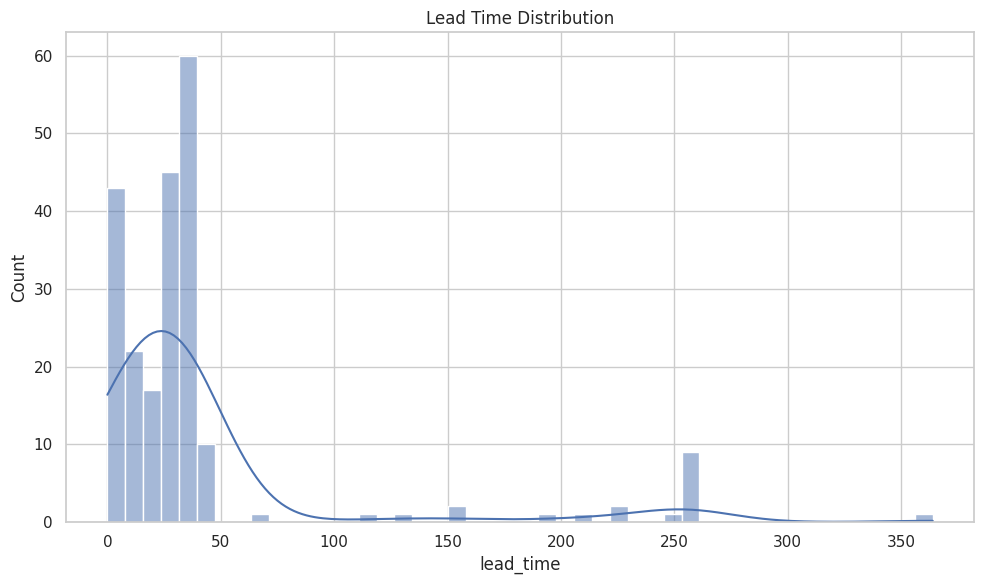

In [ ]:
sns.histplot(df['lead_time'], kde=True)
plt.title('Lead Time Distribution')
plt.tight_layout()
plt.savefig('lead_time_distribution.png')  # Save to file
plt.show()  # Display in Colab/Notebook



### **Final Insights**
- Most bookings are made 0–100 days in advance.
- Longer stays slightly increase ADR, but short stays dominate.
- Families and repeat guests show different booking behaviors.
- Special requests are more likely with longer lead time and longer stays.



